In [1]:
import nltk
from nltk.book import *
from nltk.tokenize import word_tokenize 
from collections import Counter
import string

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
def vocabulary(corpus):
    vocabulary = set()
    for instance in corpus:
        words = instance.split()
        vocabulary.update(words)
    return list(vocabulary)

In [8]:
text_words = [word.lower() for word in text1]

In [9]:
def split_by_chapters(text):
    chapters = []
    current_chapter = []
    for word in text:
        if word == 'chapter':
            if current_chapter:
                chapters.append(' '.join(current_chapter))
                current_chapter = []
        current_chapter.append(word)
    if current_chapter:
        chapters.append(' '.join(current_chapter))
    return chapters

In [15]:
chapters = split_by_chapters(text_words)
for i, chapter in enumerate(chapters[2:7], start=0):
    print(f"Chapter:\n{chapter[:500]}\n")

Chapter:
chapter 1 loomings . call me ishmael . some years ago -- never mind how long precisely -- having little or no money in my purse , and nothing particular to interest me on shore , i thought i would sail about a little and see the watery part of the world . it is a way i have of driving off the spleen and regulating the circulation . whenever i find myself growing grim about the mouth ; whenever it is a damp , drizzly november in my soul ; whenever i find myself involuntarily pausing before coffin

Chapter:
chapter 2 the carpet - bag . i stuffed a shirt or two into my old carpet - bag , tucked it under my arm , and started for cape horn and the pacific . quitting the good city of old manhatto , i duly arrived in new bedford . it was a saturday night in december . much was i disappointed upon learning that the little packet for nantucket had already sailed , and that no way of reaching that place would offer , till the following monday . as most young candidates for the pains and

In [57]:
from nltk.tag import pos_tag
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
for i, chapter in enumerate(chapters[2:3], start=0):
    tokens = word_tokenize(chapter)
tokens = [token for token in tokens if token not in string.punctuation]
pos_tag(tokens[0:10])

[('chapter', 'NN'),
 ('1', 'CD'),
 ('loomings', 'NNS'),
 ('call', 'VB'),
 ('me', 'PRP'),
 ('ishmael', 'VB'),
 ('some', 'DT'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('--', ':')]

In [161]:
from nltk.stem.wordnet import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_sentence = []
# Convert PoS tags into a format used by the lemmatizer
# and run lemmatize
for word, tag in pos_tag(tokens):
    if tag.startswith('NN'):
        pos = 'n'
    elif tag.startswith('VB'):
        pos = 'v'
    else:
        pos = 'a'
    lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
print(lemmatized_sentence)

['chapter', '1', 'loomings', 'call', 'me', 'ishmael', 'some', 'year', 'ago', '--', 'never', 'mind', 'how', 'long', 'precisely', '--', 'have', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'i', 'think', 'i', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', 'it', 'be', 'a', 'way', 'i', 'have', 'of', 'drive', 'off', 'the', 'spleen', 'and', 'regulate', 'the', 'circulation', 'whenever', 'i', 'find', 'myself', 'grow', 'grim', 'about', 'the', 'mouth', 'whenever', 'it', 'be', 'a', 'damp', 'drizzly', 'november', 'in', 'my', 'soul', 'whenever', 'i', 'find', 'myself', 'involuntarily', 'pause', 'before', 'coffin', 'warehouse', 'and', 'bring', 'up', 'the', 'rear', 'of', 'every', 'funeral', 'i', 'meet', 'and', 'especially', 'whenever', 'my', 'hypo', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', 'that', 'it', 'require', 'a', 'strong', 'moral', 'principle', 'to', 'preve

In [73]:
import pandas as pd

In [162]:
def co_occurence(tokens, window_size = 2):
    vocab = sorted(set(tokens))
    size = len(vocab)
    co_occurrence_matrix = np.zeros((size, size))

    for i, target_word in enumerate(tokens):
        target_index = vocab.index(target_word)
        start_index = max(0, i - window_size)
        end_index = min(len(tokens), i + window_size + 1)
        context = tokens[start_index:i] + tokens[i+1:end_index]
        for context_word in context:
            context_index = vocab.index(context_word)
            co_occurrence_matrix[target_index][context_index] += 1
    df = pd.DataFrame(data, vocab, vocab)
    return co_occurrence_matrix, df
matrix, df = co_occurence(tokens, 2)
df

,'',--,1,``,a,abandon,abominate,about,absent,account,...,woodlands,world,would,years,yes,yet,yonder,you,your,yourself
'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
``,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yet,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yonder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
your,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [158]:
def calc_ppmi(co_occurrence_matrix, vocab):
    total_occurrences = np.sum(co_occurrence_matrix)
    word_occurrences = np.sum(co_occurrence_matrix, axis=1)
    context_occurrences = np.sum(co_occurrence_matrix, axis=0)
    size = len(vocab)
    ppmi = np.zeros((len(co_occurrence_matrix), len(co_occurrence_matrix)))
    for i in range(len(ppmi)):
        for j in range(len(ppmi)):
            if co_occurrence_matrix[i][j] > 0:
            
                pmi = math.log((co_occurrence_matrix[i][j] * total_occurrences) /
                       (word_occurrences[i] * context_occurrences[j]), 2)
            else:
                pmi = 0
            if pmi > 0:
                ppmi[i][j] = pmi
    df = pd.DataFrame(ppmi, vocab, vocab)
    return ppmi, df

In [105]:
matrix, df = co_occurence(tokens, 4)
ppmi, df = calc_ppmi(matrix, vocab)
df

,'',--,1,``,a,abandon,abominate,about,absent,account,...,woodlands,world,would,years,yes,yet,yonder,you,your,yourself
'',0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
--,0.0,1.228423,0.0,0.0,0.000000,0.000000,0.0,0.590993,0.0,2.398348,...,0.000000,0.000000,2.398348,3.398348,0.000000,1.398348,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
``,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a,0.0,0.000000,0.0,0.0,0.106111,2.044711,0.0,0.000000,0.0,1.044711,...,2.044711,0.044711,1.044711,0.000000,2.044711,0.000000,1.044711,0.843077,0.000000,3.044711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yet,0.0,1.398348,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yonder,0.0,0.000000,0.0,0.0,1.044711,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
you,0.0,0.000000,0.0,0.0,0.843077,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,1.629673,0.000000,0.000000,0.000000,0.000000,0.000000,2.044711,3.629673
your,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,3.568273,0.000000,0.000000,0.000000,0.000000,2.044711,0.000000,0.000000


3. Additive smoothing,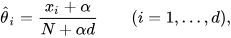

In [198]:
#щось таке можна зробити, щоб згладити pmi для значень які появляються рідко.
pmi = math.log(((co_occurrence_matrix[i][j]+1) * total_occurrences) /
                       ((word_occurrences[i]+size)* (context_occurrences[j]+size)), 2)

In [166]:
ppmi, df = calc_ppmi(matrix, vocab)
df

,'',--,1,``,a,abandon,abominate,about,absent,account,...,woodlands,world,would,years,yes,yet,yonder,you,your,yourself
'',0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
--,0.0,0.644094,0.0,0.0,0.0,0.0,0.0,1.591626,0.0,0.000000,...,0.000000,0.0,2.398981,4.398981,0.0,2.398981,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
``,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
a,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.237989,0.0,2.045344,...,3.045344,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yet,0.0,2.398981,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
yonder,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
you,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,2.630307,0.000000,0.0,0.000000,0.0,0.000000,3.045344,4.630307
your,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,3.045344,0.000000,0.000000


In [184]:
df_a = df.sailor.T
df_sorted = df_a.sort_values(ascending=False)
df_sorted

merchant    6.831941
simple      6.831941
requires    5.831941
because     5.831941
before      5.246978
              ...   
he          0.000000
head        0.000000
heads       0.000000
healthy     0.000000
yourself    0.000000
Name: sailor, Length: 859, dtype: float64

In [190]:
df_t = df.salt.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

do          6.153869
i           3.727604
a           3.045344
of          2.814019
rear        0.000000
              ...   
hazy        0.000000
he          0.000000
head        0.000000
heads       0.000000
yourself    0.000000
Name: salt, Length: 859, dtype: float64

In [185]:
df_t = df.sea.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

smelt       5.453429
sick        5.453429
soon        5.453429
hold        5.453429
holy        5.453429
              ...   
head        0.000000
heads       0.000000
healthy     0.000000
heard       0.000000
yourself    0.000000
Name: sea, Length: 859, dtype: float64

In [186]:
df_t = df.sick.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

grow        8.153869
get         6.568906
sea         5.453429
--          4.398981
''          0.000000
              ...   
hazy        0.000000
he          0.000000
head        0.000000
heads       0.000000
yourself    0.000000
Name: sick, Length: 859, dtype: float64

In [187]:
df_t = df.smelt.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

repeatedly    9.153869
having        8.153869
sea           5.453429
the           2.202584
putting       0.000000
                ...   
hazy          0.000000
he            0.000000
head          0.000000
heads         0.000000
yourself      0.000000
Name: smelt, Length: 859, dtype: float64

In [191]:
df_t = df.officer.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

invisible    8.153869
police       8.153869
ship         6.568906
sort         6.568906
on           4.568906
               ...   
having       0.000000
hazy         0.000000
he           0.000000
head         0.000000
yourself     0.000000
Name: officer, Length: 859, dtype: float64

In [192]:
df_t = df.ship.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

board       7.568906
officer     6.568906
now         5.246978
your        4.983944
were        4.761551
              ...   
hazy        0.000000
he          0.000000
head        0.000000
heads       0.000000
yourself    0.000000
Name: ship, Length: 859, dtype: float64

In [193]:
df_t = df.board.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

ship        7.568906
yet         7.153869
on          5.568906
--          4.398981
really      0.000000
              ...   
having      0.000000
hazy        0.000000
he          0.000000
head        0.000000
yourself    0.000000
Name: board, Length: 859, dtype: float64

In [194]:
df_t = df.police.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

invisible    9.153869
officer      8.153869
of           2.814019
the          2.202584
reaching     0.000000
               ...   
having       0.000000
hazy         0.000000
he           0.000000
head         0.000000
yourself     0.000000
Name: police, Length: 859, dtype: float64

In [195]:
df_t = df.invisible.T

df_sorted = df_t.sort_values(ascending=False)
df_sorted

police      9.153869
officer     8.153869
this        5.066406
the         2.202584
reaching    0.000000
              ...   
having      0.000000
hazy        0.000000
he          0.000000
head        0.000000
yourself    0.000000
Name: invisible, Length: 859, dtype: float64